<a href="https://colab.research.google.com/github/illusoryTwin/InnoML/blob/preprocessing/ML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp drive/MyDrive/ML/Assignment2/task_1_train_data.json task_1_train_data.json
!cp drive/MyDrive/ML/Assignment2/task_1_verify.json task_1_verify.json

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the dataset

In [7]:
# Upload the dataset

data = pd.read_json('task_1_train_data.json')
verify_dataset = pd.read_json('task_1_verify.json')

In [ ]:
# Let's check the data types in each column

data.dtypes

browser             object
os                  object
locale              object
user_id              int64
location            object
sites               object
time                object
date        datetime64[ns]
dtype: object

In [ ]:
# Check the contet of the dataset

data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   40000 non-null  object        
 1   os        40000 non-null  object        
 2   locale    40000 non-null  object        
 3   user_id   40000 non-null  int64         
 4   location  40000 non-null  object        
 5   sites     40000 non-null  object        
 6   time      40000 non-null  object        
 7   date      40000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.4+ MB


,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


In [ ]:
# Let's check the missing values in each column

missing_values = data.isna().sum()
missing_values

browser     0
os          0
locale      0
user_id     0
location    0
sites       0
time        0
date        0
dtype: int64

In [ ]:
# Check the unique instnaces in each column

target_columns = data[['browser', 'os', 'locale', 'location']]
target_columns

for column in target_columns:
  unique_values = target_columns[column].unique()
  print(unique_values)


['Chrome' 'Firefox' 'Safari' 'Internet Explorer']
['Debian' 'Windows 8' 'MacOS' 'Ubuntu' 'Windows 10' 'Windows 7']
['ur-PK' 'uk-UA' 'fr-FR' 'nl-NL' 'ro-RO' 'en-US' 'en-NZ' 'vi-VN' 'pt-BR'
 'es-MX' 'ja-JP' 'en-GB' 'en-SG' 'ru_RU' 'pt-PT' 'zh-CN' 'bg-BG' 'wo-SN'
 'de-DE' 'pl-PL' 'it-IT' 'xh-ZA' 'ru-RU' 'en-AU' 'en-CA']
['Russia/Moscow' 'France/Paris' 'Japan/Tokyo' 'Australia/Sydney'
 'USA/San Francisco' 'Canada/Vancouver' 'UK/London' 'Canada/Toronto'
 'Malaysia/Kuala Lumpur' 'USA/Miami' 'Italy/Rome' 'Spain/Madrid'
 'USA/Chicago' 'Germany/Berlin' 'China/Shanghai' 'India/Delhi'
 'Brazil/Rio de Janeiro' 'Singapore/Singapore' 'Netherlands/Amsterdam'
 'USA/New York' 'New Zealand/Auckland']


In [ ]:
def find_instances_location(data):
    unique_values = data['location'].unique()
    substrings = set()
    for value in unique_values:
        substring = value.split('/')[0]
        substrings.add(substring)
    instances_dict = {substring: [value for value in unique_values if value.startswith(substring)] for substring in substrings}
    return instances_dict

# Find instances starting with the same substring before "/" in location column
location_instances = find_instances_location(data)
for substring, instances in location_instances.items():
    print(f"Instances starting with '{substring}': {instances}")



def find_instances_locale(data):
    unique_values = data['locale'].unique()
    substrings = set()
    for value in unique_values:
        substring = value.split('-')[0]
        substrings.add(substring)
    instances_dict = {substring: [value for value in unique_values if value.startswith(substring)] for substring in substrings}
    return instances_dict

# Find instances starting with the same substring before "-" in locale column
locale_instances = find_instances_locale(data)
for substring, instances in locale_instances.items():
    print(f"Instances starting with '{substring}': {instances}")



Instances starting with 'China': ['China/Shanghai']
Instances starting with 'Netherlands': ['Netherlands/Amsterdam']
Instances starting with 'USA': ['USA/San Francisco', 'USA/Miami', 'USA/Chicago', 'USA/New York']
Instances starting with 'Canada': ['Canada/Vancouver', 'Canada/Toronto']
Instances starting with 'Spain': ['Spain/Madrid']
Instances starting with 'New Zealand': ['New Zealand/Auckland']
Instances starting with 'Australia': ['Australia/Sydney']
Instances starting with 'Malaysia': ['Malaysia/Kuala Lumpur']
Instances starting with 'Germany': ['Germany/Berlin']
Instances starting with 'India': ['India/Delhi']
Instances starting with 'Brazil': ['Brazil/Rio de Janeiro']
Instances starting with 'Japan': ['Japan/Tokyo']
Instances starting with 'Italy': ['Italy/Rome']
Instances starting with 'Singapore': ['Singapore/Singapore']
Instances starting with 'Russia': ['Russia/Moscow']
Instances starting with 'France': ['France/Paris']
Instances starting with 'UK': ['UK/London']
Instances s

# Revealing the dependecies and anomalies in the dataset

### As we can see, the distribution of instances across the Browser class is fairly balanced. However, there is a notable dominant class within the OS classes.

### The distribution of instances across the Locale and Location classes is fairly balanced

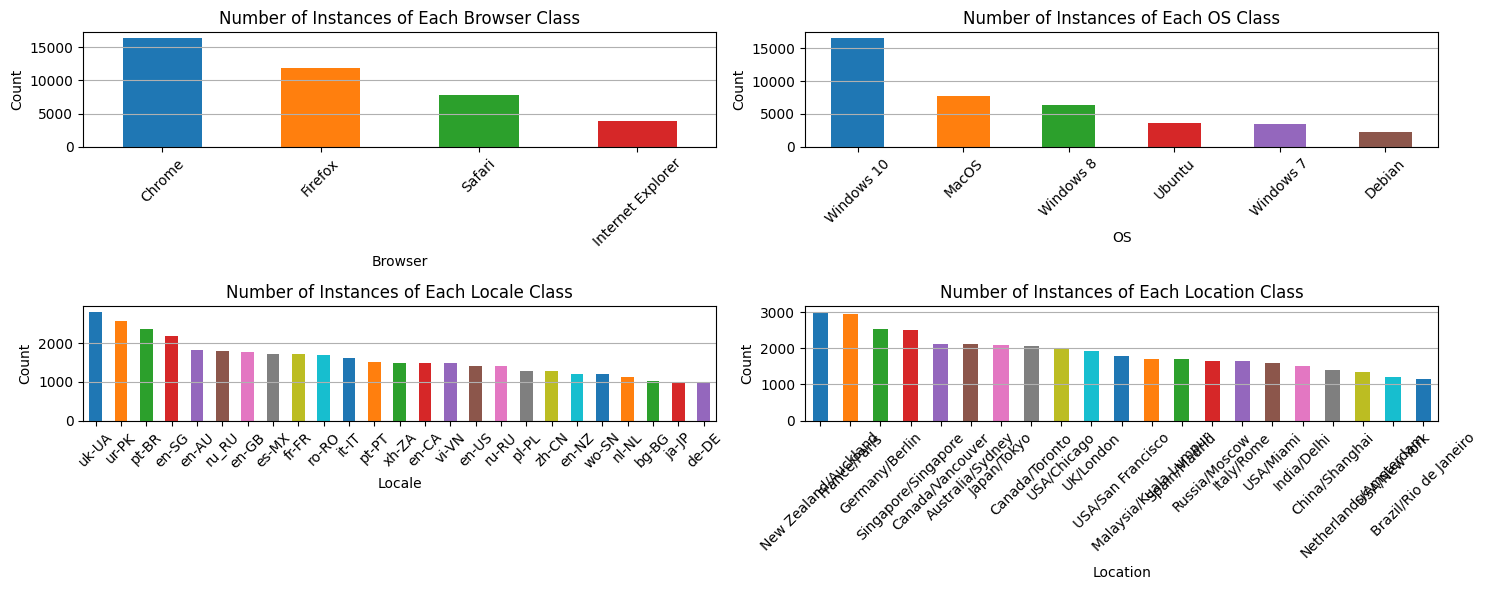

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

browser_counts = data['browser'].value_counts()
browser_counts.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_title('Number of Instances of Each Browser Class')
axes[0, 0].set_xlabel('Browser')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0, 0].grid(axis='y')  # Add grid lines along the y-axis

os_counts = data['os'].value_counts()
os_counts.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title('Number of Instances of Each OS Class')
axes[0, 1].set_xlabel('OS')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y')

locale_counts = data['locale'].value_counts()
locale_counts.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_title('Number of Instances of Each Locale Class')
axes[1, 0].set_xlabel('Locale')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y')

location_counts = data['location'].value_counts()
location_counts.plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_title('Number of Instances of Each Location Class')
axes[1, 1].set_xlabel('Location')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [12]:
# Let's create the column with a day of the week for each session in the table

data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
data

,browser,os,locale,user_id,location,sites,time,date,day_of_week
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29,Thursday
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23,Wednesday
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17,Thursday
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23,Tuesday
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23,Saturday
...,...,...,...,...,...,...,...,...,...
39995,Chrome,Windows 10,wo-SN,184,Malaysia/Kuala Lumpur,"[{'site': 'airbnb.com', 'length': 96}, {'site'...",06:45:00,2016-04-03,Sunday
39996,Chrome,Windows 10,ru_RU,181,France/Paris,"[{'site': 'lenta.ru', 'length': 84}, {'site': ...",20:57:00,2016-12-28,Wednesday
39997,Safari,MacOS,en-GB,112,Australia/Sydney,"[{'site': 'toptal.com', 'length': 65}, {'site'...",04:12:00,2016-07-26,Tuesday
39998,Safari,MacOS,pt-BR,136,India/Delhi,"[{'site': 'yworks.com', 'length': 146}, {'site...",10:18:00,2017-01-01,Sunday


In [13]:
waldo_data = data[data['user_id']==0]
non_waldo_data = data[data['user_id']!=0]
waldo_data

,browser,os,locale,user_id,location,sites,time,date,day_of_week
95,Firefox,Ubuntu,ru_RU,0,USA/Chicago,"[{'site': 'mail.google.com', 'length': 75}, {'...",02:47:00,2016-11-05,Saturday
254,Firefox,Windows 10,ru_RU,0,France/Paris,"[{'site': 'lenta.ru', 'length': 43}, {'site': ...",20:52:00,2016-05-05,Thursday
292,Chrome,Windows 10,ru_RU,0,USA/Chicago,"[{'site': 'vk.com', 'length': 79}, {'site': 'm...",03:38:00,2017-05-12,Friday
366,Chrome,Windows 10,ru_RU,0,France/Paris,"[{'site': 'mail.google.com', 'length': 71}, {'...",11:04:00,2016-05-19,Thursday
435,Chrome,Windows 10,ru_RU,0,France/Paris,"[{'site': 'mail.google.com', 'length': 72}, {'...",20:22:00,2016-06-27,Monday
...,...,...,...,...,...,...,...,...,...
39073,Chrome,Ubuntu,ru_RU,0,USA/Chicago,"[{'site': 'youtube.com', 'length': 88}, {'site...",02:22:00,2017-03-24,Friday
39231,Chrome,Ubuntu,ru_RU,0,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 87}, {'...",02:51:00,2017-08-25,Friday
39450,Chrome,Ubuntu,ru_RU,0,USA/Chicago,"[{'site': 'mail.google.com', 'length': 93}, {'...",02:39:00,2016-12-02,Friday
39893,Firefox,Ubuntu,ru_RU,0,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 49}, {'...",17:27:00,2017-09-04,Monday


### Let's examine the correlation between features and beeing a Waldo.
We can notice that certain browser, location, locale, and OS types are definitely inherent to Waldo.



In [35]:
print("Waldo locations:\n", waldo_data['location'].unique())
print("\nAll locations:\n", data['location'].unique())

Waldo locations:
 ['USA/Chicago' 'France/Paris' 'Canada/Toronto']

All locations:
 ['Russia/Moscow' 'France/Paris' 'Japan/Tokyo' 'Australia/Sydney'
 'USA/San Francisco' 'Canada/Vancouver' 'UK/London' 'Canada/Toronto'
 'Malaysia/Kuala Lumpur' 'USA/Miami' 'Italy/Rome' 'Spain/Madrid'
 'USA/Chicago' 'Germany/Berlin' 'China/Shanghai' 'India/Delhi'
 'Brazil/Rio de Janeiro' 'Singapore/Singapore' 'Netherlands/Amsterdam'
 'USA/New York' 'New Zealand/Auckland']


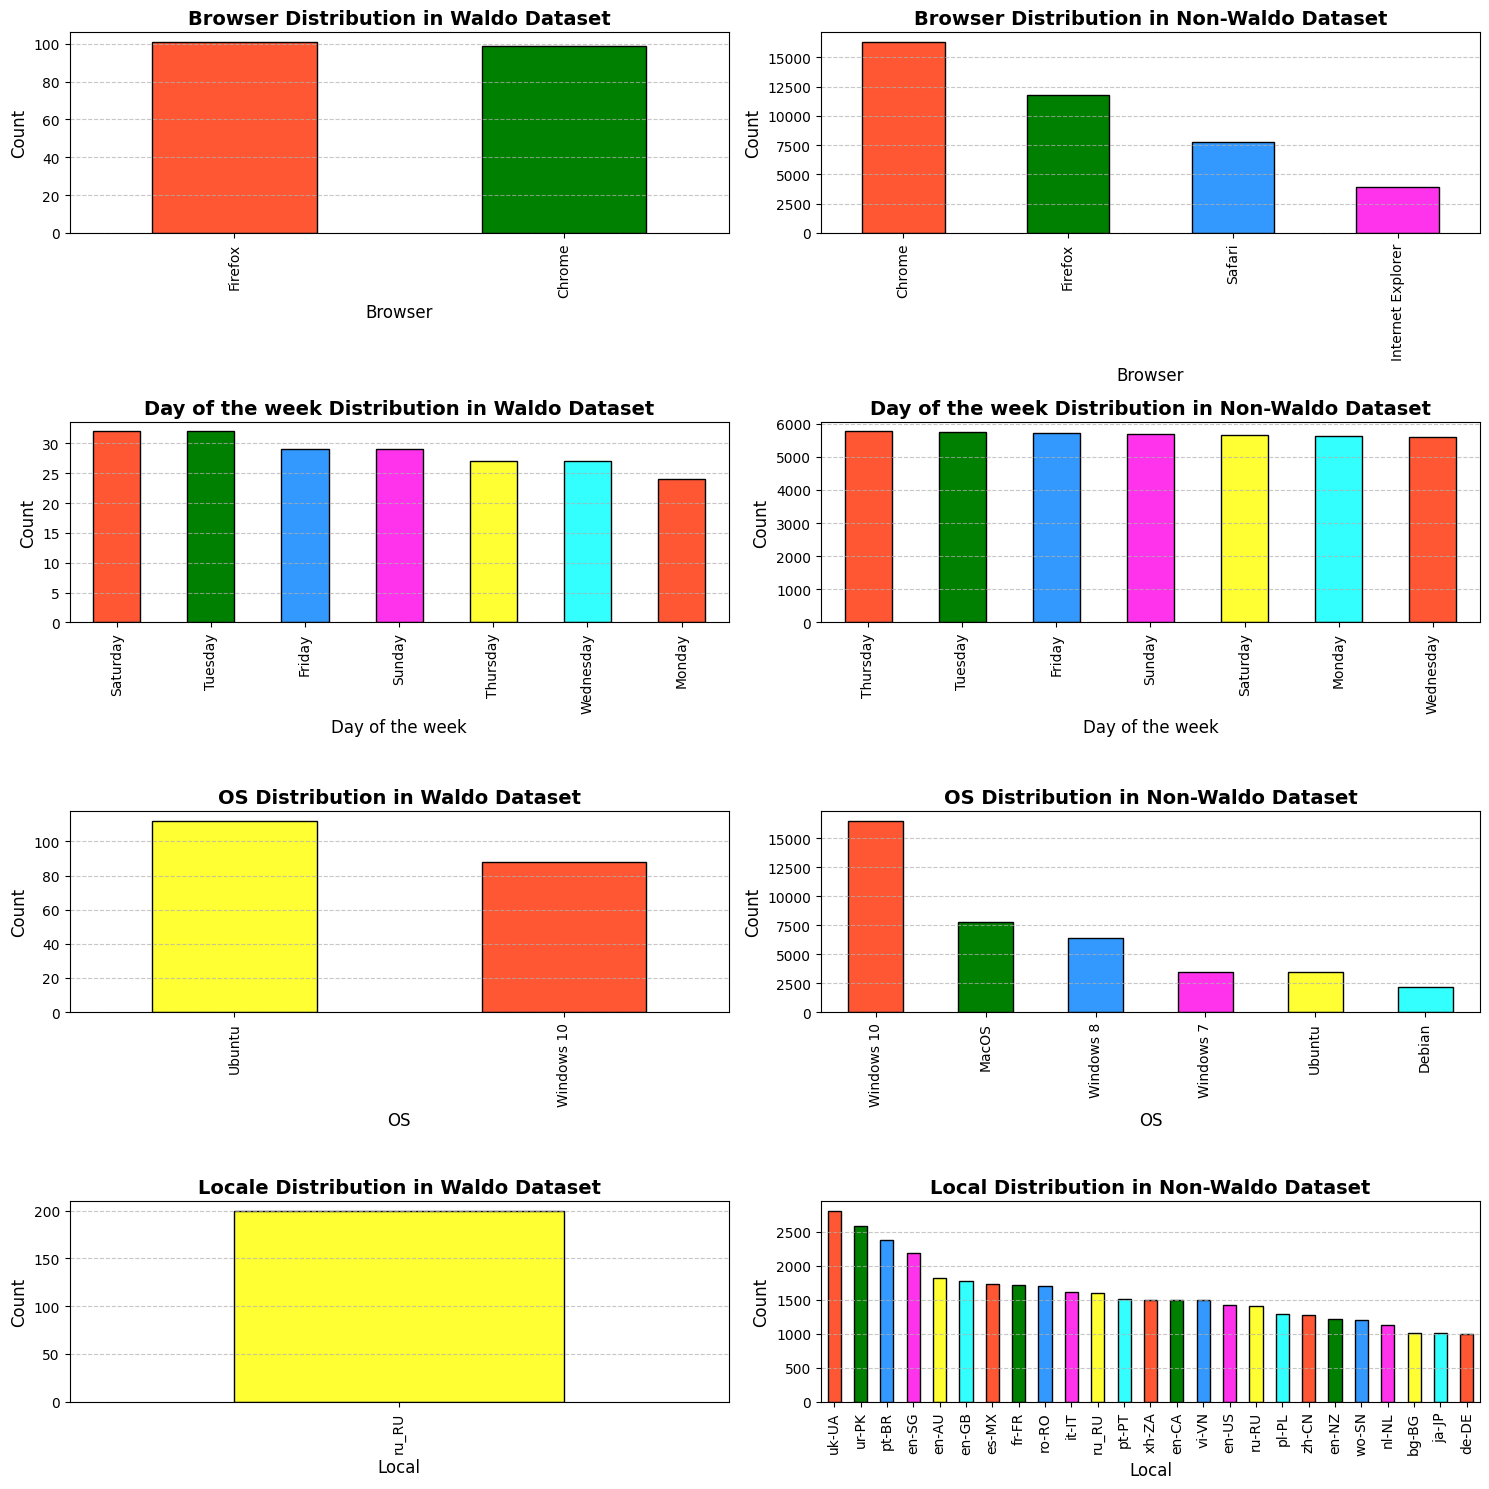

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

# Define colors for the plots
colors = ['#FF5733', 'green', '#3399FF', '#FF33EC', '#FFFF33', '#33FFFF']
colors2 = ['#FFFF33', '#FF5733']

# Plot for Browser Distribution in Waldo Dataset
plt.subplot(421)
waldo_data['browser'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Browser Distribution in Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Browser Distribution in Non-Waldo Dataset
plt.subplot(422)
non_waldo_data['browser'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Browser Distribution in Non-Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Day of the week Distribution in Waldo Dataset
plt.subplot(423)
waldo_data['day_of_week'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Day of the week Distribution in Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Day of the week Distribution in Non-Waldo Dataset
plt.subplot(424)
non_waldo_data['day_of_week'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Day of the week Distribution in Non-Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for OS Distribution in Waldo Dataset
plt.subplot(425)
waldo_data['os'].value_counts().plot(kind='bar', color=colors2, edgecolor='black', linewidth=1)
plt.title('OS Distribution in Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('OS', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for OS Distribution in Non-Waldo Dataset
plt.subplot(426)
non_waldo_data['os'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('OS Distribution in Non-Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('OS', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Plot for Waldo Dataset
plt.subplot(427)
waldo_data['locale'].value_counts().plot(kind='bar', color=colors2, edgecolor='black', linewidth=1)
plt.title('Locale Distribution in Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Local', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Non-Waldo Dataset
plt.subplot(428)
non_waldo_data['locale'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Local Distribution in Non-Waldo Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Local', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()  # Adjusts subplots to avoid overlapping
plt.show()


# Data Preprocessing and Feature Engineering

### Let's create the column `is_waldo` for waldo validation

In [ ]:
waldo_count = (data['user_id']==0).sum()
print("The number of  waldo instanes:", waldo_count, "\nThe size of the dataset:", len(data))

data['is_waldo'] = (data['user_id']==0).astype(int)
data.drop(columns='user_id', inplace=True)

data.head(5) # Let's check our dataset after the changes

The number of  waldo instanes: 200 
The size of the dataset: 40000


,browser,os,locale,location,sites,time,date,is_waldo
0,Chrome,Debian,ur-PK,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29,0
1,Firefox,Windows 8,uk-UA,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23,0
2,Safari,MacOS,fr-FR,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17,0
3,Chrome,Windows 8,nl-NL,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23,0
4,Firefox,Ubuntu,ro-RO,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23,0


In [ ]:
# Reveal the instances of waldo in the dataset
waldo_instances = data[data['is_waldo'] == 1]

# Let's check the features describing waldo
columns = ['location', 'locale', 'browser', 'os']
waldo_locaitons, waldo_locales, waldo_browsers, waldo_os = [waldo_instances[column].unique() for column in columns]

print(waldo_locaitons, "\n", waldo_locales, "\n", waldo_browsers, "\n", waldo_os)

['USA/Chicago' 'France/Paris' 'Canada/Toronto'] 
 ['ru_RU'] 
 ['Firefox' 'Chrome'] 
 ['Ubuntu' 'Windows 10']


### Extract web-domains

In [ ]:
def extract_web_domains(sites):
    return [site['site'].split('.')[0] for site in sites]

# Create the list of web domains
data['web_domains'] = data['sites'].apply(lambda x: extract_web_domains(x))
data.drop(columns='sites', inplace=True)

data.head(5) # Let's check our dataset after the changes

,browser,os,locale,location,time,date,is_waldo,web_domains
0,Chrome,Debian,ur-PK,Russia/Moscow,04:12:00,2017-06-29,0,"[bing, live, twitter, googleapis, ucr, runnabl..."
1,Firefox,Windows 8,uk-UA,France/Paris,03:57:00,2016-03-23,0,"[yahoo, baidu, wikimedia, pinterest, bestinlin..."
2,Safari,MacOS,fr-FR,Japan/Tokyo,05:26:00,2016-11-17,0,[oracle]
3,Chrome,Windows 8,nl-NL,Australia/Sydney,00:05:00,2016-08-23,0,"[mail, slack, youtube]"
4,Firefox,Ubuntu,ro-RO,USA/San Francisco,22:55:00,2016-07-23,0,"[mail, mail, toptal, ouituan, canailleblog, ha..."


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA


# Convert the lists of web domains into text
data['web_domains_text'] = data['web_domains'].apply(lambda x: ' '.join(x))

# Convert text data to numerical format using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['web_domains_text'])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

# Extract the principal components
principal_components = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Concatenate with the original DataFrame for further analysis if needed
data = pd.concat([data, principal_components], axis=1)
data.head(5)

,browser,os,locale,location,time,date,is_waldo,web_domains,web_domains_text,PC1,PC2
0,Chrome,Debian,ur-PK,Russia/Moscow,04:12:00,2017-06-29,0,"[bing, live, twitter, googleapis, ucr, runnabl...",bing live twitter googleapis ucr runnable mobp...,-0.685645,-0.283422
1,Firefox,Windows 8,uk-UA,France/Paris,03:57:00,2016-03-23,0,"[yahoo, baidu, wikimedia, pinterest, bestinlin...",yahoo baidu wikimedia pinterest bestinlinux 5e...,-0.529232,-0.091684
2,Safari,MacOS,fr-FR,Japan/Tokyo,05:26:00,2016-11-17,0,[oracle],oracle,-0.421630,-0.158612
3,Chrome,Windows 8,nl-NL,Australia/Sydney,00:05:00,2016-08-23,0,"[mail, slack, youtube]",mail slack youtube,0.663917,0.558449
4,Firefox,Ubuntu,ro-RO,USA/San Francisco,22:55:00,2016-07-23,0,"[mail, mail, toptal, ouituan, canailleblog, ha...",mail mail toptal ouituan canailleblog hautetfo...,0.673694,-0.034364


In [ ]:
def time_to_sec(time_str):
  h, min, sec = map(int, time_str.split(':'))
  return 3600*h+60*min+sec

data['time'] = data['time'].apply(time_to_sec)

In [ ]:
data.head(5)

,browser,os,locale,location,time,date,is_waldo,web_domains,web_domains_text,PC1,PC2
0,Chrome,Debian,ur-PK,Russia/Moscow,15120,2017-06-29,0,"[bing, live, twitter, googleapis, ucr, runnabl...",bing live twitter googleapis ucr runnable mobp...,-0.685649,-0.283299
1,Firefox,Windows 8,uk-UA,France/Paris,14220,2016-03-23,0,"[yahoo, baidu, wikimedia, pinterest, bestinlin...",yahoo baidu wikimedia pinterest bestinlinux 5e...,-0.529247,-0.091724
2,Safari,MacOS,fr-FR,Japan/Tokyo,19560,2016-11-17,0,[oracle],oracle,-0.421627,-0.158580
3,Chrome,Windows 8,nl-NL,Australia/Sydney,300,2016-08-23,0,"[mail, slack, youtube]",mail slack youtube,0.663913,0.558786
4,Firefox,Ubuntu,ro-RO,USA/San Francisco,82500,2016-07-23,0,"[mail, mail, toptal, ouituan, canailleblog, ha...",mail mail toptal ouituan canailleblog hautetfo...,0.673677,-0.033888


In [ ]:
data.drop(columns=['web_domains', 'web_domains_text', 'date'], inplace=True)

In [ ]:
data.head(5)

,browser,os,locale,location,time,is_waldo,PC1,PC2
0,Chrome,Debian,ur-PK,Russia/Moscow,15120,0,-0.685656,-0.283067
1,Firefox,Windows 8,uk-UA,France/Paris,14220,0,-0.529252,-0.091797
2,Safari,MacOS,fr-FR,Japan/Tokyo,19560,0,-0.421616,-0.159010
3,Chrome,Windows 8,nl-NL,Australia/Sydney,300,0,0.663908,0.558723
4,Firefox,Ubuntu,ro-RO,USA/San Francisco,82500,0,0.673672,-0.033962


## Encode categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data = pd.get_dummies(data, columns=['os', 'browser', 'locale', 'location'])

# data = data.drop(columns = ['os', 'browser', 'locale', 'location'], inplace=True, axis=1)
data.head(5)


# data['os'] = pd.get_dummies(data, columns=['os'])
# data['browser'] = pd.get_dummies(data, columns=['browser'])
# data['locale'] = pd.get_dummies(data, columns=['locale'])
# data['location'] = pd.get_dummies(data, columns=['location'])

# data['os'] = OneHotEncoder().fit_transform(data['os'].values)
# data['browser'] = OneHotEncoder().fit_transform(data['browser'].values)
# data['locale'] = OneHotEncoder().fit_transform(data['locale'].values)
# data['location'] = OneHotEncoder().fit_transform(data['location'].values)

KeyError: "None of [Index(['os', 'browser', 'locale', 'location'], dtype='object')] are in the [columns]"

In [ ]:
data.head(4)

,time,is_waldo,PC1,PC2,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,15120,0,-0.685645,-0.283422,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,14220,0,-0.529232,-0.091684,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,19560,0,-0.421630,-0.158612,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,300,0,0.663917,0.558449,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.head(5)

,browser,os,locale,location,time,is_waldo,PC1,PC2
0,0,0,20,13,15120,0,-0.685649,-0.283299
1,1,5,19,5,14220,0,-0.529247,-0.091724
2,3,1,9,9,19560,0,-0.421627,-0.158580
3,0,5,12,0,300,0,0.663913,0.558786
4,1,2,16,20,82500,0,0.673677,-0.033888


In [ ]:
data[data['is_waldo'] == 0]

,browser,os,locale,location,time,is_waldo,PC1,PC2
0,0,0,20,13,15120,0,-0.685647,-0.283405
1,1,5,19,5,14220,0,-0.529252,-0.091694
2,3,1,9,9,19560,0,-0.421617,-0.158592
3,0,5,12,0,300,0,0.663908,0.558792
4,1,2,16,20,82500,0,0.673667,-0.033880
...,...,...,...,...,...,...,...,...
39995,0,3,22,10,24300,0,0.009484,-0.294954
39996,0,3,18,5,75420,0,1.791746,0.210737
39997,3,1,4,0,15120,0,1.228041,-0.786204
39998,3,1,14,7,37080,0,-0.313456,-0.160895


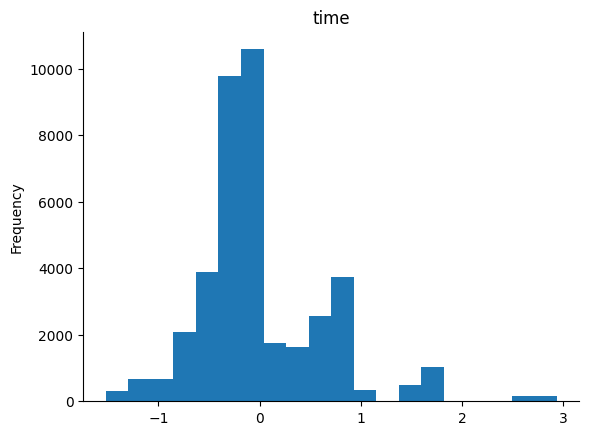

In [ ]:
from matplotlib import pyplot as plt
data[data['is_waldo'] == 0]['PC2'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data[data['is_waldo'] == 1]

,browser,os,locale,location,time,is_waldo,PC1,PC2
95,1,2,18,17,10020,1,1.793216,0.211458
254,1,3,18,5,75120,1,0.359499,-0.314282
292,0,3,18,17,13080,1,1.792192,0.210775
366,0,3,18,5,39840,1,1.791752,0.210652
435,0,3,18,5,73320,1,1.792086,0.210934
...,...,...,...,...,...,...,...,...
39073,0,2,18,17,8520,1,0.893960,0.285550
39231,0,2,18,2,10260,1,1.337078,0.405927
39450,0,2,18,17,9540,1,1.791752,0.210652
39893,1,2,18,2,62820,1,1.740847,0.213539


from matplotlib import pyplot as plt
_df_0['browser'].plot(kind='hist', bins=20, title='browser')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['os'].plot(kind='hist', bins=20, title='os')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['location'].plot(kind='hist', bins=20, title='location')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='browser', y='os', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='os', y='location', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='location', y='time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='time', y='PC1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['locale']
  ys = series['browser']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('locale', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('locale')
_ = plt.ylabel('browser')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['locale']
  ys = series['os']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('locale', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('locale')
_ = plt.ylabel('os')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['locale']
  ys = series['location']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('locale', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('locale')
_ = plt.ylabel('location')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['locale']
  ys = series['PC1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('locale', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('locale')
_ = plt.ylabel('PC1')

from matplotlib import pyplot as plt
_df_12['browser'].plot(kind='line', figsize=(8, 4), title='browser')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['os'].plot(kind='line', figsize=(8, 4), title='os')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['location'].plot(kind='line', figsize=(8, 4), title='location')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['time'].plot(kind='line', figsize=(8, 4), title='time')
plt.gca().spines[['top', 'right']].set_visible(False)

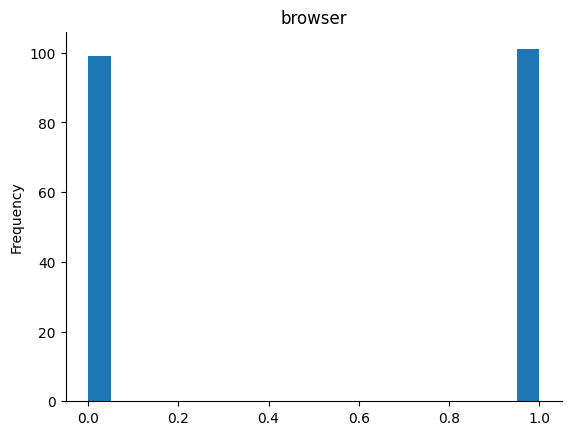

In [ ]:
from matplotlib import pyplot as plt
_df_0['browser'].plot(kind='hist', bins=20, title='browser')
plt.gca().spines[['top', 'right',]].set_visible(False)

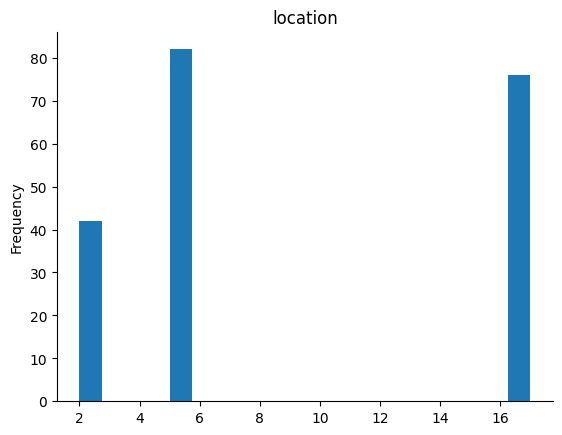

In [ ]:
from matplotlib import pyplot as plt
_df_2['location'].plot(kind='hist', bins=20, title='location')
plt.gca().spines[['top', 'right',]].set_visible(False)

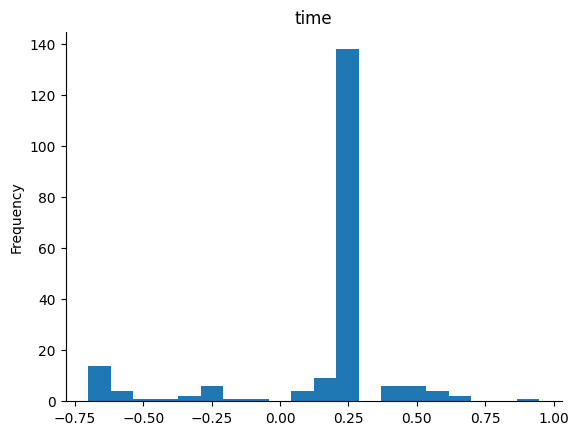

In [ ]:
from matplotlib import pyplot as plt
_df_3['PC2'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.drop(columns=['time', 'PC1', 'PC2'], inplace=True)

KeyError: "['time'] not found in axis"

In [ ]:
data.drop(columns=['PC1', 'PC2'], inplace=True)

In [ ]:
data.head(4)

,is_waldo,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,browser_Chrome,browser_Firefox,browser_Internet Explorer,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,0,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Normalize, etc.

# Now, the dataset is prepared

# Building an ANN model

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='is_waldo')
y = data['is_waldo']

X = X.astype(float)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

       os_Debian  os_MacOS  os_Ubuntu  os_Windows 10  os_Windows 7  \
0            1.0       0.0        0.0            0.0           0.0   
1            0.0       0.0        0.0            0.0           0.0   
2            0.0       1.0        0.0            0.0           0.0   
3            0.0       0.0        0.0            0.0           0.0   
4            0.0       0.0        1.0            0.0           0.0   
...          ...       ...        ...            ...           ...   
39995        0.0       0.0        0.0            1.0           0.0   
39996        0.0       0.0        0.0            1.0           0.0   
39997        0.0       1.0        0.0            0.0           0.0   
39998        0.0       1.0        0.0            0.0           0.0   
39999        0.0       0.0        0.0            0.0           0.0   

       os_Windows 8  browser_Chrome  browser_Firefox  \
0               0.0             1.0              0.0   
1               1.0             0.0            

In [ ]:
X_train

,PC1,PC2,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,browser_Chrome,browser_Firefox,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
29360,0.562931,-0.666982,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
20815,1.447487,-1.207311,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
29886,-0.301753,-0.366345,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
30403,0.214929,0.493493,False,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
16255,-0.725028,-0.308223,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30592,-0.658319,-0.185150,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
8664,-0.313483,-0.160977,False,False,False,False,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
24967,-0.745481,-0.195221,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
34925,-0.235395,0.775670,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
batch_size = 32
test_batch_size = 100


# 3. Data Loader.
train_loader = DataLoader((X_train, y_train),
                          batch_size=batch_size, shuffle=False)
test_loader = DataLoader(X_test,
                         batch_size=test_batch_size, shuffle=False)

In [ ]:
y_train[y_train == 1]

35296    1
35987    1
13651    1
33534    1
6414     1
        ..
26117    1
7675     1
17449    1
20015    1
23321    1
Name: is_waldo, Length: 160, dtype: int64

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# class ANN(nn.Module):
#     def __init__(self, input_size):
#         super(ANN, self).__init__()
#         self.hidden1 = nn.Linear(input_size, 256)
#         self.hidden2 = nn.Linear(256, 100)
#         self.output = nn.Linear(100, 1)

#     # The batch x is of size (batch, 28 * 28)
#     def forward(self, x):
#         x = F.relu(self.hidden1(x))
#         x = F.relu(self.hidden2(x))
#         x = self.output(x)
#         return F.log_softmax(x, dim=1)
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 450)
        # self.fc3 = nn.Linear(450, 8)
        self.fc4 = nn.Linear(450, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x


model = ANNModel(input_size=X_train.shape[1]).to(device)

print(model)

ANNModel(
  (fc1): Linear(in_features=56, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=450, bias=True)
  (fc4): Linear(in_features=450, out_features=1, bias=True)
)


In [ ]:
# Number of iterations over the whole data set
epochs = 25
# Learning rate for Stochastic Gradient Descent
lr = 0.01
# SGD parameter to accelerate the optimization, check https://paperswithcode.com/method/sgd-with-momentum
momentum = 0.5
# Loss function - cross entropy, the multiclass variant of that you used in Lab 3
criterion = nn.CrossEntropyLoss()

In [ ]:
X_train.values

array([[0, 3, 0, ...,
        'slack toptal up2 56img twitfond larevueautomobile soft-concept indexweb',
        0.5629282751430228, -0.6669309526713376],
       [1, 2, 23, ...,
        'slack toptal slack lenta artechedizioni potterybarnkids',
        1.4474942140934586, -1.2072430516549144],
       [0, 3, 16, ...,
        'ggpht facebook toptal digicert yahoo skyscanner lijit',
        -0.3017878850638717, -0.3666702950878138],
       ...,
       [1, 3, 2, ...,
        'facebook ggpht digicert ytimg disqus paris-sorbonne secure-aus',
        -0.7454725196589318, -0.19532301598669666],
       [1, 3, 19, ...,
        'instagram disqus wikimedia youtube qq937 idris esiea netmediaeurope drapeaux-shop t2c',
        -0.23540251452150987, 0.7753621241338151],
       [1, 4, 19, ..., 'lenta vk mail mi9 blogger', 0.6263499382781074,
        -0.15271675052254474]], dtype=object)

In [ ]:
X_train_tensor.shape

torch.Size([32000, 7])

In [ ]:
X_train.values[0]

array([0.5629311773900304, -0.6669824803723018, False, False, False, True,
       False, False, True, False, False, False, True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, True, False, False, False, False,
       False, False, False, False, False, False], dtype=object)

In [ ]:
X_test.values[0]

array([0.9308405473308454, 1.4606627104084122, False, False, False, True,
       False, False, False, False, True, False, True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, True, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=object)

In [ ]:
X_train_scaled

array([[ 0.76367194, -1.06855341, -0.24262389, ..., -0.20245725,
        -0.17482169, -0.2146143 ],
       [ 1.96479842, -1.93229368, -0.24262389, ..., -0.20245725,
        -0.17482169, -0.2146143 ],
       [-0.4104709 , -0.58797044, -0.24262389, ..., -0.20245725,
        -0.17482169, -0.2146143 ],
       ...,
       [-1.0130032 , -0.31442103, -0.24262389, ..., -0.20245725,
        -0.17482169,  4.65952172],
       [-0.32036486,  1.23759257, -0.24262389, ..., -0.20245725,
        -0.17482169, -0.2146143 ],
       [ 0.84977545, -0.24659053, -0.24262389, ..., -0.20245725,
        -0.17482169, -0.2146143 ]])

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

def train( model, device, train_loader, optimizer, epoch):
    # Do not forget to set train() to update weights of model
    model.train()
    # A wrapper over data loader to show progress bar
    bar = tqdm(train_loader)
    iteration = 0.0
    overall_loss = 0.0
    for data, target in bar:
        # Device of data and model must be the same
        data, target = data.to(device), target.to(device)
        # To avoid an accumulation of gradients
        optimizer.zero_grad()
        # Prediction
        output = model(data)
        # Error between prediction and ground truth
        loss = criterion(output.view(-1), target)
        # Compute gradient
        loss.backward()
        # Update params of model
        optimizer.step()

        iteration += 1
        overall_loss += loss.item()

        bar.set_postfix({"Loss": format(overall_loss/iteration, '.6f')})

In [ ]:
# Collection of optimizers
import torch.optim as optim
from tqdm import tqdm

# optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    #test(model, device, test_loader)

# Optionally, you can save the params of model to file
#torch.save(model.state_dict(), "mnist_model.pt")

100%|██████████| 1000/1000 [00:08<00:00, 122.29it/s, Loss=0.554518]


In [ ]:
from sklearn.metrics import classification_report

model.eval()

with torch.no_grad():
    test_output = model(X_test_tensor)
    y_pred = (test_output.cpu().view(-1) > 0.5).int()
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7960
           1       0.00      0.00      0.00        40

    accuracy                           0.99      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.99      0.99      0.99      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import torch.optim as optim
from tqdm import tqdm

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (data, target) in progress_bar:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1), target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=epoch_loss / (batch_idx + 1))

Epoch 1/100:   0%|          | 0/1 [00:00<?, ?it/s]


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pandas.core.frame.DataFrame'>

In [ ]:
# Collection of optimizers
import torch.optim as optim

# optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    #test(model, device, test_loader)

# Optionally, you can save the params of model to file
#torch.save(model.state_dict(), "mnist_model.pt")

 99%|█████████▉| 988/1000 [00:05<00:00, 172.38it/s, Loss=0.499277]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

model.eval()

with torch.no_grad():
    test_output = model(X_test_tensor)
    y_pred = (test_output.cpu().view(-1) > 0.5).int()
    print(classification_report(y_test, y_pred))

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
from tqdm import tqdm

def train( model, device, train_loader, optimizer, epoch):
    # Do not forget to set train() to update weights of model
    model.train()
    # A wrapper over data loader to show progress bar
    bar = tqdm(train_loader)
    iteration = 0
    overall_loss = 0
    for data, target in bar:
        print(f"{data}, {target}")
        # Device of data and model must be the same
        data, target = data.to(device), target.to(device)
        # To avoid an accumulation of gradients
        optimizer.zero_grad()
        # Prediction
        output = model(data)
        # Error between prediction and ground truth
        loss = criterion(output, target)
        # Compute gradient
        loss.backward()
        # Update params of model
        optimizer.step()

        iteration += 1
        overall_loss += loss.item()
        bar.set_postfix({"Loss": format(overall_loss/iteration, '.6f')})

In [ ]:
# Number of iterations over the whole data set
epochs = 5
# Learning rate for Stochastic Gradient Descent
lr = 0.01
# SGD parameter to accelerate the optimization, check https://paperswithcode.com/method/sgd-with-momentum
momentum = 0.5
# Loss function - cross entropy, the multiclass variant of that you used in Lab 3
criterion = nn.CrossEntropyLoss()
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)



AttributeError: module 'numpy' has no attribute 'zip'

In [ ]:
def test( model, device, test_loader):
    # Do not forget to set eval() to keep model's params the same
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    test_loss /= len(test_loader.dataset)
    print(f"Test set: Average loss: {test_loss}, Accuracy: {100. * correct / len(test_loader.dataset)} ")

In [ ]:
# Collection of optimizers
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

# Optionally, you can save the params of model to file
#torch.save(model.state_dict(), "mnist_model.pt")


  0%|          | 0/1000 [00:00<?, ?it/s]


KeyError: 31035

In [ ]:
 class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

input_size = X_train.shape[1]
model = ANNModel(input_size)

In [ ]:
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (data, target) in progress_bar:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1), target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=epoch_loss / (batch_idx + 1))


ValueError: could not determine the shape of object type 'DataFrame'

# Working version

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

X = data.drop(columns='is_waldo')
y = data['is_waldo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


AttributeError: 'Tensor' object has no attribute 'drop'

In [ ]:


# Convert pandas DataFrame to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader objects
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=test_batch_size, shuffle=True)


import torch.nn as nn
# For activation functions
from torch import sigmoid


# Specify the hardware for model run, choose GPU if possible
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")



import torch
import torch.nn as nn
import torch.nn.functional as F


# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.hidden1 = nn.Linear(input_size, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.hidden3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)  # Output layer for binary classification

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x


#  class ANNModel(nn.Module):
#     def __init__(self, input_size):
#         super(ANNModel, self).__init__()
#         self.fc1 = nn.Linear(input_size, 32)
#         self.fc2 = nn.Linear(32, 16)
#         self.fc3 = nn.Linear(16, 8)
#         self.fc4 = nn.Linear(8, 1)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.sigmoid(self.fc4(x))
#         return x


# # Instantiate the model
# model = ANN(input_size=X_train.shape[1]).to(device)

# # Define the loss function
# criterion = nn.BCEWithLogitsLoss()

# # Define the optimizer
# # optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
# optimizer = optim.Adam(model.parameters(), lr=0.001)




# # Number of iterations over the whole data set
# epochs = 5
# # Learning rate for Stochastic Gradient Descent
# lr = 0.01
# # SGD parameter to accelerate the optimization, check https://paperswithcode.com/method/sgd-with-momentum
# momentum = 0.5



# # Training loop
# def train(model, device, train_loader, optimizer, epoch):
#     model.train()
#     bar = tqdm(train_loader)
#     iteration = 0
#     overall_loss = 0
#     for data, target in bar:
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output.squeeze(), target)  # Squeeze the output to match the shape of target
#         loss.backward()
#         optimizer.step()
#         iteration += 1
#         overall_loss += loss.item()
#         bar.set_postfix({"Loss": format(overall_loss/iteration, '.6f')})

# # Training loop
# for epoch in range(1, epochs + 1):
#     train(model, device, train_loader, optimizer, epoch)


In [ ]:
input_size = X_train.shape[1]
model = ANNModel(input_size)


from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (data, target) in progress_bar:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1), target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=epoch_loss / (batch_idx + 1))


ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
model.eval()

with torch.no_grad():
    test_output = model(X_test_tensor)
    y_pred = (test_output.cpu().view(-1) > 0.5).int()
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7964
           1       0.66      0.58      0.62        36

    accuracy                           1.00      8000
   macro avg       0.83      0.79      0.81      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
# def test( model, device, test_loader):
#     # Do not forget to set eval() to keep model's params the same
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             # sum up batch loss
#             test_loss += F.nll_loss(output, target, reduction='sum').item()
#             pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)

#     test_loss /= len(test_loader.dataset)
#     print(f"Test set: Average loss: {test_loss}, Accuracy: {100. * correct / len(test_loader.dataset)} ")





# Define the test function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # Compute the negative log likelihood loss
            test_loss += F.binary_cross_entropy_with_logits(output.squeeze(), target, reduction='sum').item()
            pred = (output > 0.5).float()  # Convert logits to binary predictions
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(f"Test set: Average loss: {test_loss}, Accuracy: {100. * correct / len(test_loader.dataset)} ")


In [ ]:
# Collection of optimizers
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

# Optionally, you can save the params of model to file
#torch.save(model.state_dict(), "mnist_model.pt")

100%|██████████| 838/838 [00:05<00:00, 166.03it/s, Loss=0.018676]


Test set: Average loss: 0.020388506963623293, Accuracy: 99.48484848484848 


100%|██████████| 838/838 [00:05<00:00, 163.02it/s, Loss=0.018488]


Test set: Average loss: 0.020315597309081845, Accuracy: 99.48484848484848 


100%|██████████| 838/838 [00:05<00:00, 162.03it/s, Loss=0.018325]


Test set: Average loss: 0.020230409648608078, Accuracy: 99.48484848484848 


100%|██████████| 838/838 [00:05<00:00, 165.75it/s, Loss=0.018208]


Test set: Average loss: 0.02018453804098747, Accuracy: 99.48484848484848 


100%|██████████| 838/838 [00:05<00:00, 167.32it/s, Loss=0.018108]


Test set: Average loss: 0.020129062785682352, Accuracy: 99.48484848484848 


In [ ]:
from sklearn.metrics import classification_report
model.eval()

with torch.no_grad():
    test_output = model(X_test_tensor)
    y_pred = (test_output.cpu().view(-1) > 0.5).int()
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13132
           1       0.00      0.00      0.00        68

    accuracy                           0.99     13200
   macro avg       0.50      0.50      0.50     13200
weighted avg       0.99      0.99      0.99     13200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Говно!

In [ ]:
# test dataset - waldo
